# Project: Wrangling and Analyze Data

## Importing Data

In [212]:

import numpy as np
import pandas as pd
import requests
import json
import tweepy
import re
import matplotlib.pyplot as plt
import seaborn as sns



## Gathering Data

Now I will to collect my data from **3 sources** which are:

1.   csv file
2.   tsv file
3.   json file

**First:** i will change this csv file ` twitter-archive-enhanced.csv ` into dataframe1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [213]:
csv_df = pd.read_csv('twitter-archive-enhanced.csv')
csv_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


I used `.read_csv ` method to change the file into dataframe

**Second:** i will change this tsv file ` image-predictions.tsv ` into dataframe

In [214]:
tsv_df = pd.read_csv('image-predictions.tsv', sep='\t')
tsv_df.head(10)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


I used `.read_csv ` method whit ` sep =\t ` to change the file into dataframe


**Third:** i will change this json file ` tweet-json.txt ` into dataframe

In [215]:
import json

data = []

with open("tweet-json", "r") as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print("Invalid line skipped:", e)

import pandas as pd
json_df = pd.DataFrame(data)
json_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


I used `.read_json ` method  to change the file into dataframe


Now i have **collected** the data i want and i will start the second step which is Data Assessment


## Assessing Data



In this part, I will find Qualities and Tidiness problems in the data

**In the First Data:**

*First:* I will use `.info()` to know information about the first file

In [216]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

I have found that there are many problems
* there are many null values (completeness issue) in many coloumns
* there are wrong datatypes (validity issue) in many coloumns
* there are coloumn for each kind of dog (tidiness)

 * *Second:* I will use `.describe()` to know information about the first file



In [217]:
csv_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


I have found aproblem
* there are outlires in the max values in many coloumns (accuracy issue)

**In the Second Data:**



 * *First:* I will use `.info()` to know information about the second file

In [218]:
tsv_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


I have seen that there is wrong datatypes (validity issue) in `tweet_id` coloumns


 * *Second:* I will use `.describe()` to know information about the second file

In [219]:
tsv_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


I have found that there is no  problem here


**In The Third Data:**

*First:* I will use `.info()` to know information about the Third file

In [220]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

I have found that there are many problems
* there are many null values (completeness issue) in many coloumns
* there are empty coloumns !!
* there are wrong datatypes (validity issue) in some coloumn

 * *Second:* I will use `.describe()` to know information about the Third file


In [221]:
json_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


I have found that there are some problems
* there are outliers in max  values in many coloumns

### Quality issues
After checking the 3 data , i had found many great problems like:

1. **Validity(In the first data)**

2. **Completness (In the first data)**

3. **Logical(In the first data)**

4. **validity(In the second data)**

5. **Completness(In the third data)**

6. **Another great completness problem (in the third data)**

7. **Validity (In the third data)**

8. **Logical(In the third data)**

### Tidiness issues
After i had seen the data carefully and i had made visually assess to the data , i discovered that ther is great issue

1. **one variable per coloumn**


2. **there are 3 predictions for dogs**


## Cleaning Data
In this section, i will clean **all** of the issues i documented while assessing.



At the first i will make acopy for the data

In [222]:
csv_df = csv_df.copy()
tsv_df = tsv_df.copy()
json_df = json_df.copy()

###**Tidiness**

#### 1.**one variable per coloumn**:

##### Define:
In the first data:
After i had seen the data carefully and i had made visually assess to the data , i discovered that ther is great issue , which is:"

**one variable per coloumn**
___
The dog types `doggo`, `floofer`, `pupper`, and `puppo` are actually one categorical variable "dog type". But they are spread across four columns.

##### Code

In [223]:
# Step 1: Check columns
print(csv_df.columns.tolist())  # Print column names

# Step 2: Combine doggo, floofer, pupper, puppo into one 'sorts' column
def combine_sorts(row):
    dogs_types = ['doggo', 'floofer', 'pupper', 'puppo']
    found = [dogs_type for dogs_type in dogs_types if dogs_type in row and row[dogs_type] == dogs_type]
    return ','.join(found) if found else None

csv_df['dog_type'] = csv_df.apply(combine_sorts, axis=1)

# Step 3: Drop the original stage columns (only if they exist)
columns_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
existing_columns = [col for col in columns_to_drop if col in csv_df.columns]

if existing_columns:
    csv_df.drop(existing_columns, axis=1, inplace=True)
else:
    print("Columns to drop not found:", columns_to_drop)


['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


I have fixed the issues  and now we have 1 colown contain all the kinds of dogs ;to solve the problem and now i will try to see the data after fixing it
and i will try to see the data again

##### Test

In [224]:
csv_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
246,845677943972139009,NaN,NaN,2017-03-25 16:45:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. Please only send in dogs. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845677943...,12,10,NaN,None
2199,668779399630725120,NaN,NaN,2015-11-23 13:13:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevon. He is not physically or mentall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668779399...,10,10,Kevon,None
1939,673887867907739649,NaN,NaN,2015-12-07 15:32:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a great time sleeping and y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673887867...,10,10,NaN,None
1125,730196704625098752,NaN,NaN,2016-05-11 00:43:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's camera shy. Tail longer ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730196704...,6,10,Charles,None
866,762035686371364864,NaN,NaN,2016-08-06 21:20:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This left me speechless. 14/10 heckin heroic a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762035686...,14,10,NaN,None


#### 2.** There are 3 predictions for dogs**:

##### Define
I have found that there are 3 predictions for the dogs , ican use all of them , but i will use only one , i will ues the prediction with the highest confidence


##### Code

In [225]:
#tsv_df.head(10)
def best_prediction(row):
    breeds = ['p1', 'p2', 'p3']
    confs = ['p1_conf', 'p2_conf', 'p3_conf']
    dogs = ['p1_dog', 'p2_dog', 'p3_dog']
    valid_breeds = [(breeds[i], confs[i], dogs[i]) for i in range(3)]
    if valid_breeds:
        best_breed, best_conf, _ = max(valid_breeds, key=lambda x: row[x[1]])
        return row[best_breed], row[best_conf]
    return None, None

# Apply the function to the entire DataFrame
tsv_df[['best_breed', 'best_confidence']] = tsv_df.apply(best_prediction, axis=1, result_type="expand")

# Now tsv_df contains the 'best_breed' and 'best_confidence' columns for all rows

# To view the first 10 rows (or any number of rows), use:
tsv_df.drop(['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace=True)


Since this data is about dogs , so any predicton that this isnot dog is wrong so i will delet it

##### Test

In [226]:
tsv_df.sample(10)

,tweet_id,jpg_url,img_num,best_breed,best_confidence
649,681891461017812993,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,1,Chihuahua,0.203570
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930
73,667369227918143488,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248
628,680889648562991104,https://pbs.twimg.com/media/CXMBhXfWEAA4mMI.jpg,1,Shetland_sheepdog,0.876337
716,685641971164143616,https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg,1,Lakeland_terrier,0.253839
1914,854120357044912130,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4,black-and-tan_coonhound,0.854861
1353,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525
1287,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.929390
1964,867072653475098625,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.352946


###**Quality**

#### 1. **Validity(In the first data):**

##### Define:
there are wrong datatypes  in `tweet_id`, coloumn which should be `str` not `int`


##### Code

In [227]:
csv_df['tweet_id']= csv_df['tweet_id'].astype(str)
csv_df['in_reply_to_status_id']= csv_df['in_reply_to_status_id'].astype(str)
csv_df['in_reply_to_user_id']= csv_df['in_reply_to_user_id'].astype(str)
csv_df['retweeted_status_id']= csv_df['retweeted_status_id'].astype(str)
csv_df['retweeted_status_user_id']= csv_df['retweeted_status_user_id'].astype(str)

##### Test

In [228]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        1611 non-null   object
 13  dog_type                    380 non-null    obje

now i changed the datatype of the coloumn by using `.astype()`

#### 2. **Completness (In the first data):**

##### Define:
there are many colomns like `in_reply_to_status_id` , `in_reply_to_user_id` ,  `retweeted_status_id`
 , `retweeted_status_user_id` , `retweeted_status_timestamp` , `expanded_urls` , `name`,`dogs_type`

##### Code

In [229]:


# I filled the null values with 0 since they are IDs or timestamps, which are numerical or represent a lack of value.
csv_df['expanded_urls'] = csv_df['expanded_urls'].fillna('')
# For 'name', assuming it could be a string, filling with 'unknown' or an empty string is more appropriate than 0.
csv_df['name'] = csv_df['name'].fillna('unknown')
csv_df['dog_type'] = csv_df['dog_type'].fillna('unknown')
# Combine the fills for id columns
id_cols_to_fill = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
csv_df[id_cols_to_fill] = csv_df[id_cols_to_fill].fillna(" ")

# Fill timestamp with a placeholder like 0 or NaT if it's a datetime type.
# Assuming it's a string or object for now, filling with an empty string or specific placeholder.
csv_df['retweeted_status_timestamp'] = csv_df['retweeted_status_timestamp'].fillna('')


##### Test

In [230]:
csv_df.info()
csv_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  2356 non-null   object
 9   expanded_urls               2356 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  dog_type                    2356 non-null   obje

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


Now I have solved the first problem and i used `.fillna()` to replace null values with other values

#### 3. **Logical(In the first data):**

##### Define:
there are outlires in the max values in many coloumns (accuracy issue) like `rating_numerator`,`rating_denominator`


   

##### Code

In [231]:

# Flag outliers (no deleting)
csv_df['numerator_outlier'] = csv_df['rating_numerator'] > 20
csv_df['denominator_outlier'] = csv_df['rating_denominator'] != 10

# Optional: Try to extract correct rating from tweet text
def extract_rating(text):
    match = re.search(r'(\d+)/(\d+)', str(text))
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

csv_df[['extracted_numerator', 'extracted_denominator']] = csv_df['text'].apply(
    lambda x: pd.Series(extract_rating(x))
)

# Show summary
print("Numerator outliers:", csv_df['numerator_outlier'].sum())
print("Denominator outliers:", csv_df['denominator_outlier'].sum())
print("Fixed values available in extracted_numerator/denominator")




Numerator outliers: 24
Denominator outliers: 23
Fixed values available in extracted_numerator/denominator


##### Test

In [232]:
csv_df.describe()

,rating_numerator,rating_denominator,extracted_numerator,extracted_denominator
count,2356.000000,2356.000000,2356.000000,2356.000000
mean,13.126486,10.455433,13.126486,10.455433
std,45.876648,6.745237,45.876648,6.745237
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,10.000000
50%,11.000000,10.000000,11.000000,10.000000
75%,12.000000,10.000000,12.000000,10.000000
max,1776.000000,170.000000,1776.000000,170.000000


now i have solved thw problem and solved the denominator and numerator rating

#### 4. **validity(In the second data):**

##### Define:
I have seen that there is wrong datatypes  in `tweet_id` coloumns which should be `str` not `int`


##### Code

In [233]:
tsv_df['tweet_id']= tsv_df['tweet_id'].astype(str)

##### Test

In [234]:
tsv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   best_breed       2075 non-null   object 
 4   best_confidence  2075 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.2+ KB


i have changed the datatype using `.astype()` to `str`

#### 5. **Completness(In the third data):**

##### Define
* there are many null values in many coloumns like `extended_entities`,`retweeted_status`,`possibly_sensitive`,`possibly_sensitive_appealable`  


##### Code

In [235]:

json_df['extended_entities'] = json_df['extended_entities'].fillna(" ")
json_df['retweeted_status'] = json_df['retweeted_status'].fillna(" ")
json_df['possibly_sensitive'] = json_df['possibly_sensitive'].fillna( False)  # Assuming boolean or fill with a specific value
json_df['possibly_sensitive_appealable'] = json_df['possibly_sensitive_appealable'].fillna(False)  # Assuming boolean or fill with a specific value


<ipython-input-235-d07ef73dc4aa>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  json_df['possibly_sensitive'] = json_df['possibly_sensitive'].fillna( False)  # Assuming boolean or fill with a specific value
<ipython-input-235-d07ef73dc4aa>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  json_df['possibly_sensitive_appealable'] = json_df['possibly_sensitive_appealable'].fillna(False)  # Assuming boolean or fill with a specific value


##### Test

In [236]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2354 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

i used `.fillna()` to git rid of null values

#### 6. **Another great completness problem (in the third data):**

##### Define:
there are many empty coloumns or data that the non null in it is less than 5% , so i will drop these colomns

##### Code

In [237]:


json_df = json_df.drop(columns=[
    'in_reply_to_status_id',
    'in_reply_to_status_id_str',
    'in_reply_to_user_id',
    'in_reply_to_user_id_str',
    'in_reply_to_screen_name',
    'geo',
    'coordinates',
    'place',
    'contributors',
    'quoted_status_id',
    'quoted_status_id_str',
    'quoted_status'
])


##### Test

In [238]:
json_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     2354 non-null   object
 1   id                             2354 non-null   int64 
 2   id_str                         2354 non-null   object
 3   full_text                      2354 non-null   object
 4   truncated                      2354 non-null   bool  
 5   display_text_range             2354 non-null   object
 6   entities                       2354 non-null   object
 7   extended_entities              2354 non-null   object
 8   source                         2354 non-null   object
 9   user                           2354 non-null   object
 10  is_quote_status                2354 non-null   bool  
 11  retweet_count                  2354 non-null   int64 
 12  favorite_count                 2354 non-null   int64 
 13  fav

I used `.drop()` to delete these empty colums

#### 7. **Validity (In the third data):**

##### Define:
there are some coloumns that have wrong datatype like `id` & `created_at`

##### Code

In [239]:
json_df['id'] = json_df['id'].astype(str)
json_df['created_at'] = pd.to_datetime(json_df['created_at'])


<ipython-input-239-f25e436d5116>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  json_df['created_at'] = pd.to_datetime(json_df['created_at'])


##### Test

In [240]:
json_df.info()
json_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2354 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


now i have corrected the datatype of the colums

#### 8. **Logical(In the third data):**

##### Define:
there are outliers in `retweet_count` & `favorite_count`

##### Code

In [241]:

# Calculate the Interquartile Range (IQR) for both columns
Q1_retweets = json_df['retweet_count'].quantile(0.25)
Q3_retweets = json_df['retweet_count'].quantile(0.75)
IQR_retweets = Q3_retweets - Q1_retweets

Q1_favorites = json_df['favorite_count'].quantile(0.25)
Q3_favorites = json_df['favorite_count'].quantile(0.75)
IQR_favorites = Q3_favorites - Q1_favorites

# Define the outlier bounds
lower_bound_retweets = Q1_retweets - 1.5 * IQR_retweets
upper_bound_retweets = Q3_retweets + 1.5 * IQR_retweets

lower_bound_favorites = Q1_favorites - 1.5 * IQR_favorites
upper_bound_favorites = Q3_favorites + 1.5 * IQR_favorites

# Identify the outliers
outliers_retweets = json_df[(json_df['retweet_count'] < lower_bound_retweets) | (json_df['retweet_count'] > upper_bound_retweets)]
outliers_favorites = json_df[(json_df['favorite_count'] < lower_bound_favorites) | (json_df['favorite_count'] > upper_bound_favorites)]


# Cap outliers (replace with bounds - often preferred to removal)
json_df['retweet_count'] = json_df['retweet_count'].clip(lower=lower_bound_retweets, upper=upper_bound_retweets)
json_df['favorite_count'] = json_df['favorite_count'].clip(lower=lower_bound_favorites, upper=upper_bound_favorites)



##### Test

In [242]:
json_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,2498.785790,6835.086767
std,2486.604471,7338.561245
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,8193.250000,23183.125000


now i tried to solve the problem of outliers

###**Merging the three dataframes together**

Now i will merge the 3 dataframes in one dataframe to continue

In [243]:
# We will merge on 'tweet_id' which is common and unique across the dataframes.
# json_df has the 'id' column which corresponds to 'tweet_id' in the other dataframes.
# Let's rename 'id' in json_df to 'tweet_id' for easier merging.
json_df.rename(columns={'id': 'tweet_id'}, inplace=True)

# Now merge the dataframes
# Start by merging csv_df and tsv_df
merged_df = pd.merge(csv_df, tsv_df, on='tweet_id', how='left')

# Then merge the result with json_df
merged_df = pd.merge(merged_df, json_df, on='tweet_id', how='left')

merged_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status
2284,667192066997374976,nan,nan,2015-11-19 04:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*takes several long deep breaths* omg omg oMG ...,nan,nan,,https://twitter.com/dog_rates/status/667192066...,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,115.0,414.0,False,False,False,False,et,
1674,682259524040966145,nan,nan,2015-12-30 17:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's an Iglesias Hufflepoof. Quite t...,nan,nan,,https://twitter.com/dog_rates/status/682259524...,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,1375.0,4578.0,False,False,False,False,en,
357,830173239259324417,nan,nan,2017-02-10 21:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kyro. He's a Stratocumu...,8.09220051211604e+17,4196983835.0,2016-12-15 02:14:29 +0000,https://twitter.com/dog_rates/status/809220051...,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6554.0,0.0,False,False,False,False,en,{'created_at': 'Thu Dec 15 02:14:29 +0000 2016...
2098,670727704916926465,nan,nan,2015-11-28 22:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,nan,nan,,https://twitter.com/dog_rates/status/670727704...,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,403.0,887.0,False,False,False,False,en,
1961,673359818736984064,nan,nan,2015-12-06 04:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steve. He was just relaxing in hot tub...,nan,nan,,https://twitter.com/dog_rates/status/673359818...,...,"{'id': 4196983835, 'id_str': '4196983835', 'na...",False,728.0,1558.0,False,False,False,False,en,


I used `.merge()` with common coloumn between the 3 dataframes
(there are coloumns that exist in dataframes and donot exist in other)

In [244]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   object             
 1   in_reply_to_status_id          2356 non-null   object             
 2   in_reply_to_user_id            2356 non-null   object             
 3   timestamp                      2356 non-null   object             
 4   source_x                       2356 non-null   object             
 5   text                           2356 non-null   object             
 6   retweeted_status_id            2356 non-null   object             
 7   retweeted_status_user_id       2356 non-null   object             
 8   retweeted_status_timestamp     2356 non-null   object             
 9   expanded_urls                  2356 non-null   object             
 10  rating_numerator        

## Storing Data


Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [245]:

merged_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, i will analyze and visualize my wrangled data. I will produce  **three (3) insights and one (1) visualization.**

### Distribution of Retweet Counts

#### Insights:
1. Understand the popularity distribution: See which retweet count ranges are most common.
2. Identify popular content: Spot tweets with significantly higher retweet counts (potential outliers).
3. Inform content strategy: Understand what kind of content gets retweeted more, which can help in creating more engaging tweets.
4. Analyze trends over time: If the data includes timestamps, you could visualize retweet counts over time to see trends.


####visualization:

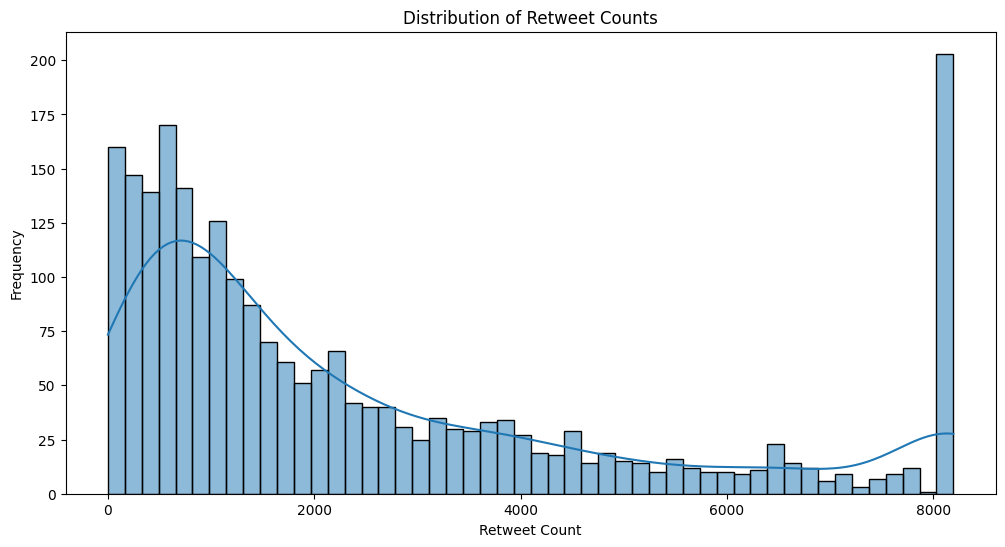

In [246]:

# Ensure the column exists and handle potential missing values before plotting
    # Create a figure and axes for the plot
plt.figure(figsize=(12, 6))

    # Create the histogram using seaborn
sns.histplot(data=merged_df, x='retweet_count', bins=50, kde=True)

    # Add title and labels
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')


plt.show()


### Engagement Metrics



Tweets with higher ratings tend to receive more favorites and retweets. The scatter plot below shows the relationship between retweet counts and favorite counts, colored by the rating given to the dog.



####Insight: Do Higher Ratings Lead to Higher Engagement?

The scatter plot reveals a **strong positive correlation** between retweet count and favorite count — tweets that get more retweets also tend to receive more favorites. This is expected in social media dynamics, where visibility drives engagement.

Interestingly, we can also observe that tweets with **very high ratings** (e.g., 13, 14, 15 out of 10) tend to cluster in the **upper-right area** of the plot. This suggests that **higher-rated dogs often receive more engagement**, likely due to audience enthusiasm or the perceived cuteness/funniness of the dog.

However, not all high-rating tweets perform equally — some tweets with ratings of 12 or 13 may still have lower engagement, indicating that **other factors like image quality, timing, and dog breed** may also influence popularity.

In short, **higher ratings often correlate with more likes and retweets**, but it's not the only factor driving engagement.


####visualization:

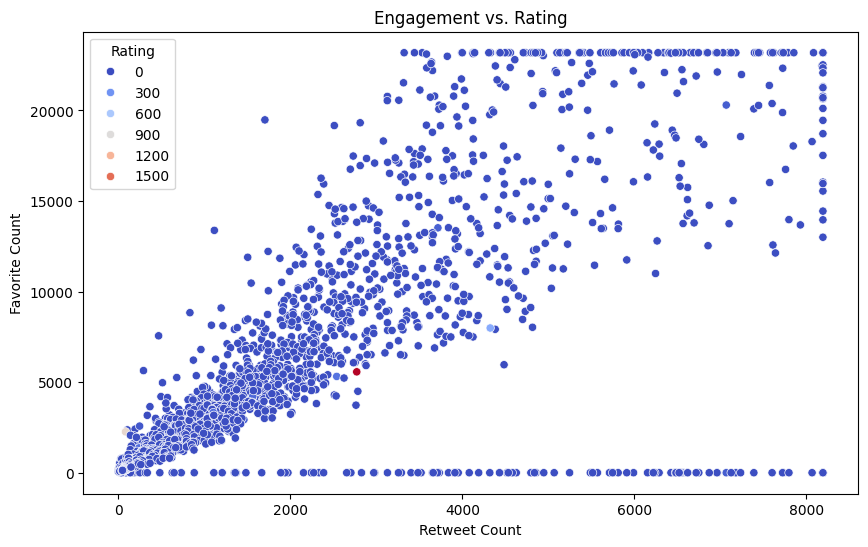

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=merged_df['retweet_count'], y=merged_df['favorite_count'], hue=merged_df['rating_numerator'], palette='coolwarm')
plt.title('Engagement vs. Rating')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.legend(title='Rating')
plt.savefig('engagement_scatter.png')  # This saves the image
plt.show()
